<a href="https://colab.research.google.com/github/m-schildt/TED/blob/main/TED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<a href="https://github.com/m-schildt/TED-Tenders-Electronic-Daily">
<img  src="https://i.imgur.com/bpWj04P.png">
</a>

```
Exploring EU tenders with Python

A walk-through of our Data Structures & Algorithms final project
Marco Schildt and Santiago Sordo
Master of Data Science for Public Policy - Hertie School - Fall 2021
```




# 0. Setting things up

Before we begin, lets clone [our repository](https://github.com/m-schildt/TED-Tenders-Electronic-Daily) to use its contents and navigate to the folder containing our scripts:

In [1]:
!git clone https://github.com/m-schildt/TED
path = '/content/TED/scripts'
import os
os.chdir(path)

Cloning into 'TED'...
remote: Enumerating objects: 167, done.
remote: Counting objects: 100% (130/130), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 167 (delta 74), reused 21 (delta 10), pack-reused 37
Receiving objects: 100% (167/167), 200.45 KiB | 5.57 MiB/s, done.
Resolving deltas: 100% (83/83), done.


Now let's import our scripts:

In [2]:
from retriever import retrieve
from decompressor import decompress
from extractor import extract
from converter import convert

And back to our root directory:

In [3]:
os.chdir('../..')

# 1. Introduction

## 1.1 Context
The procurement of goods and services is one of the core tasks a government must successfully accomplish to keep a country running. According to the World Bank, trillions of euros are spent every year by governments in what is the largest global marketplace, and the EU with its single market is one of the largest players within it. Transparency of taxpayer-money allocation in procurement processes is hence paramount to government accountability.

Tenders Electronic Daily (TED) is the online version of the EU’s public procurement journal. TED offers free and open access to tender and contract documents in XML format dating back to 1993. The documents contain information like contracting entity, description of the services rendered and contract value.



## 1.2 Problem definition

While the availability of TED documents is a great asset for transparency, producing actionable insights requires significant understanding of the repository’s documents, databases and systems in addition to data science skills. Without these, accessing the data, consolidating reports and generating knowledge can be daunting, rendering transparency of EU procurement a luxury out of the reach of most stakeholders.


## 1.3 Proposal

While some level of technical knowledge is ineluctable, access to TED data can be improved by the provision of tools that facilitate the production of actionable insights. We propose to create a set of tools that will ebable a beginner-level Python-savvy user (like us!) to obtain some insights into the tenders available in TED.

To achieve this, we have developed a set of functions written in Python that automate the basic steps of the data science pipeline: get (`retrieve()` and `decompress`), clean (`extract()`) and prepare (also `extract()`). There is also some currency convertion ahead, for which we will use `convert()`.

In the following sections, we will demonstrate each of these functions with an example. In the final section, we will use the output of our pipeline -a CSV containing useful variables- to provide some insights into a randomly selected day's worth of XML files.


## 1.4 About our repository and this notebook

Whil our GitHub repository is home to all our work, we decided to create this explainer notebook to guide you through our project. As you can see, here we briefly comment each file, but put them to the test with a real example. We ask that you refer back to the repo to view the fully commented scripts we created.

# 2. Demonstration

In this section, we will walk you through the pipeline that turns a pile of XMLs into modest but already insight-packed set of CSVs. In the final subsection we perform a very short but illustrative exploration of the kind of questions that can be answered with out work.

## 2.1 Retrieving a file with `retrieve()`

The first step in the pipeline is to retrieve a file. The TED FTP repository contains, among other directories, two directories with sets of compressed files: one by day called `daily-packages` and one by month called `monthly-packages`. We will be working with the former.

Within this directory, the files are stored by year and then by month. Within each month's subdirectory, there are files that follow the following naming convention: date_file-number. The dates follow a 'YYYYMMDD' format and the file numbers a 'YYYYXXX' format. In the latter, 'XXX' is the actual file number for that year the specific date has for that year. Only one file per day, if any, exists. All files are compressed tarballs, and thus have a tar.gz extension.

For example, the file for March 9, 2017 would have '20170309_2017XXX' as a name. The 'XXX' part cannot be determined in advance, as these numbers are assigned as files are generated. This means that if the first file of the year is for January 2, its name should be 'YYYY0102_YYYY001'. With this naming structure, and given that there is only one file per day, it is sufficient to search for that file which starts with a desired 'YYYYMMDD' to retrieve it if it exists.

Note that this naming convention only works for ranges of dates starting in 2011, which will be our test case.

To retrieve a file, we simply do the following:

In [4]:
retrieve("20200918")

File was downloaded successfully.


'20200918_2020182.tar.gz'

The file should now be available under 'Files' if you click on the menu on the left.

## 2.2 Decompressing a file with `decompress`

Now that we have our tarball, the next step is to decompress it. We will store the XML files it contains in an object called `xml_files`:


In [5]:
xml_files = decompress('20200918_2020182.tar.gz')

File was decompressed successfully.


How many XMLs are in there?

In [6]:
len(xml_files)

4939

This corresponds to 4,939 tenders full of XML tags to explore.

## 2.3 Parsing the XMLs with `extract()`

To give you an idea of the complexity involved in parsing the XMLs. Let's have a look at the element tree of our first file:

```
# This is formatted as code
```



In [7]:
from xml.etree import ElementTree

with open(xml_files[0], 'rt') as file:
    tree = ElementTree.parse(file)

for node in tree.iter():
    print(node.tag, node.attrib)

{http://publications.europa.eu/resource/schema/ted/R2.0.9/publication}TED_EXPORT {'{http://www.w3.org/2001/XMLSchema-instance}schemaLocation': 'http://publications.europa.eu/resource/schema/ted/R2.0.9/publication TED_EXPORT.xsd', 'VERSION': 'R2.0.9.S03.E01', 'DOC_ID': '440687-2020', 'EDITION': '2020182'}
{http://publications.europa.eu/resource/schema/ted/R2.0.9/publication}TECHNICAL_SECTION {}
{http://publications.europa.eu/resource/schema/ted/R2.0.9/publication}RECEPTION_ID {}
{http://publications.europa.eu/resource/schema/ted/R2.0.9/publication}DELETION_DATE {}
{http://publications.europa.eu/resource/schema/ted/R2.0.9/publication}FORM_LG_LIST {}
{http://publications.europa.eu/resource/schema/ted/R2.0.9/publication}COMMENTS {}
{http://publications.europa.eu/resource/schema/ted/R2.0.9/publication}LINKS_SECTION {}
{http://publications.europa.eu/resource/schema/ted/R2.0.9/publication}XML_SCHEMA_DEFINITION_LINK {'{http://www.w3.org/1999/xlink}type': 'simple', '{http://www.w3.org/1999/xlin

As you can see, the complexity is daunting, and many of the fields in the file are empty. In its current state, our data doesn't even give us a clue as to what questions are sensible.

In order to simplify our problem and demonstrate what is possible, we will be obtaining the contents of the following attributes:
- tender ID
- contractee
- contractor
- CPV: Common Procurement Vocabulary - subject matter of public contracts
- type of "items" supplied: works, service or supplies
- country of contractee
- NUTS: Nomenclature of Territorial Units for Statistics - refering to a geographic region
- value
- currency

A complete list of the codes in each available XML schema can be found [here](https://op.europa.eu/en/web/eu-vocabularies/e-procurement/tedschemas).

To achieve this, we just have to run `extract()`!:

In [8]:
extract(xml_files, "20200918.csv")

## 2.4 Exploration

Let's have a look at what we just extracted into a CSV. Click on the button that looks like this to better navigate the data frame: <img src=https://i.imgur.com/uS7Hc2P.png height = 50>

In [9]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

tenders = pd.read_csv('20200918.csv')
tenders

,ID,Contractee,Contractor,CPV,Type,Country,Nuts,Value,Currency
0,439549-2020,Asociația Universităților a Institutelor de Ce...,E-NFORMATION,72320000,SERVICES,RO,RO213,38698700.00,RON
1,439549-2020,Asociația Universităților a Institutelor de Ce...,S.C. ROMDIDAC S.A. S.A.,72320000,SERVICES,RO,RO213,2294603.00,RON
2,437675-2020,Klinikum Region Hannover GmbH,Leica GmbH,38510000,SUPPLIES,DE,DE929,430429.79,EUR
3,437299-2020,Kaarea Oy,Veraisen Leipomo Oy,15810000,SUPPLIES,FI,FI1C1,800000.00,EUR
4,437299-2020,Kaarea Oy,Lunden Food Oü,15810000,SUPPLIES,FI,FI1C1,600000.00,EUR
...,...,...,...,...,...,...,...,...,...
4986,437442-2020,Município de Elvas,Alfagene Novas Tecnologias das Ciências da Vid...,38900000,SUPPLIES,PT,PT186,58581.00,EUR
4987,437442-2020,Município de Elvas,Unicam — Sistemas Analíticos Lda.,38900000,SUPPLIES,PT,PT186,80900.00,EUR
4988,437442-2020,Município de Elvas,VWR — Internacional Lda.,38900000,SUPPLIES,PT,PT186,20925.40,EUR
4989,440918-2020,Midlands and Lancashire Commissioning Support ...,PremCard Ltd,85100000,SERVICES,UK,UKG13,3653.66,GBP


A last step for comparability is currency convesrion. To create a column with the value of each tender converted into euros, we only need to do the sun our `convert()` function. This uses an extrnal API, and for now uses the current exchange rate. Of course this can be improved to use the tender date's rate, but we won't do this for the time being. Let's run this:

In [11]:
tenders = convert(tenders)
tenders

,ID,Contractee,Contractor,CPV,Type,Country,Nuts,Value,Currency,Value in EUR
0,439549-2020,Asociația Universităților a Institutelor de Ce...,E-NFORMATION,72320000,SERVICES,RO,RO213,38698700.00,RON,7833744.94
1,439549-2020,Asociația Universităților a Institutelor de Ce...,S.C. ROMDIDAC S.A. S.A.,72320000,SERVICES,RO,RO213,2294603.00,RON,464494.53
2,437675-2020,Klinikum Region Hannover GmbH,Leica GmbH,38510000,SUPPLIES,DE,DE929,430429.79,EUR,430429.79
3,437299-2020,Kaarea Oy,Veraisen Leipomo Oy,15810000,SUPPLIES,FI,FI1C1,800000.00,EUR,800000.00
4,437299-2020,Kaarea Oy,Lunden Food Oü,15810000,SUPPLIES,FI,FI1C1,600000.00,EUR,600000.00
...,...,...,...,...,...,...,...,...,...,...
4986,437442-2020,Município de Elvas,Alfagene Novas Tecnologias das Ciências da Vid...,38900000,SUPPLIES,PT,PT186,58581.00,EUR,58581.00
4987,437442-2020,Município de Elvas,Unicam — Sistemas Analíticos Lda.,38900000,SUPPLIES,PT,PT186,80900.00,EUR,80900.00
4988,437442-2020,Município de Elvas,VWR — Internacional Lda.,38900000,SUPPLIES,PT,PT186,20925.40,EUR,20925.40
4989,440918-2020,Midlands and Lancashire Commissioning Support ...,PremCard Ltd,85100000,SERVICES,UK,UKG13,3653.66,GBP,4298.42


## 2.5 Gaining insights

Now we can start posing interesting questions and obtain some answers.

### 2.4.1 What is the total value of the tenders reported in datour example?

In [12]:
"€{:,.2f}".format(sum(tenders['Value in EUR']))

'€28,797,411,358.07'

As you can see, the total value of the tenders reported for September 18, 2020 was a staggering €28,811,347,333.60! Let that sink in: more than 28 billion euros!

### 2.4.2 What countries reported the largest amount of tenders that day and how many tenders per country are there?

In [13]:
cbc = tenders.groupby(["Country"]).size()
cbc = cbc.sort_values(ascending = False)
cbc = cbc.to_frame()[:10]
cbc

,0
Country,
PL,973
FR,817
RO,526
DE,503
SE,361
ES,283
SI,152
HR,149
IE,125


Poland reported the largest number of tenders, with 973. Does this mean that the country also transacted the highest total value that day

### 2.4.3 What countries reported the largest euro value that day and what are their totals?

In [14]:
pd.options.display.float_format = '€{:,.2f}'.format
vbc = tenders.groupby(['Country'], as_index = False).sum()
vbc = vbc.sort_values(['Value in EUR'], ascending = False)
vbc = vbc[['Country', 'Value in EUR']]
vbc[:10]

,Country,Value in EUR
11,FR,"€11,584,956,056.32"
23,PL,"€6,414,702,374.90"
15,IE,"€4,148,109,494.70"
0,AT,"€3,441,659,778.20"
29,UK,"€973,774,037.49"
17,IT,"€703,598,534.32"
22,NO,"€405,480,981.77"
9,ES,"€342,729,095.97"
10,FI,"€109,687,591.27"
6,DE,"€103,208,088.54"


No it is not Poland, it is actually France, and it is almost double what Poland transacted, which means the average tender for France is larger than that of Poland.

### 2.4.4 Let's do some visualization!

Let's visualize the tables we have produced to gain a better understanding of the data we have produced. A plot of the total value per country should let us gage how different each country is in this respect.

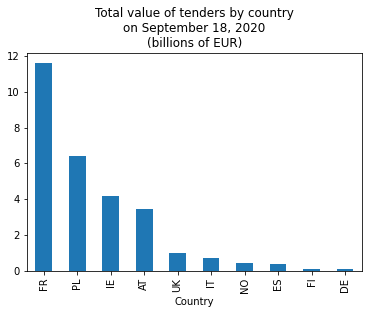

In [15]:
vbc.insert(2, "Billions", vbc['Value in EUR']/1000000000, True)
vbc = vbc[:10]
title = "Total value of tenders by country\non September 18, 2020\n(billions of EUR)"
vbc.plot.bar(x = "Country", y = "Billions", rot = 90, title = title, legend = False)

As we can see, Ireland and Austria have very similar total values, and Germany is quite far behind. Despite BREXIT taking place on 31 January 2020, the UK is still very high up there; why? This is the kind of insight that produces more questions than answers.

Let's now visualize the other table, and explore the number of conracts:

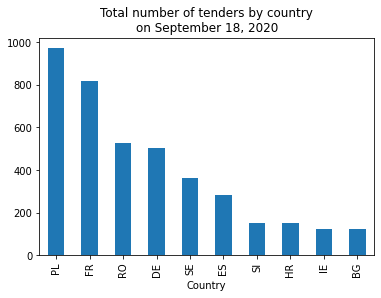

In [16]:
cbc = tenders.groupby(["Country"], as_index = False).size()
cbc = cbc.sort_values(['size'], ascending = False)
cbc = cbc[:10]
title = "Total number of tenders by country\non September 18, 2020"
cbc.plot.bar(x = "Country", y = "size", rot=90, title=title, legend = False)

Interestingly, Germany doesn't do bad at all in this metric. However, despite its comparatively large number of contracts, we know their value is not large, why is this the case? We'll leave that for another day.

# 3. Conlsusion

As we hope to have shown, while the path from an repository full with XML tenders to some insights that might increase transparency -and hence accountability- is long, a simple set of functions that automate some tasks is already a step in the right direction. We reckon no layperson would be able to build the tools we have developed, but it is not far-fetched to think that a somewhat nerdy intern at an NGO might use pre-built funcions like ours to get some actionable insights into the huge marketplace that are EU tenders.

In the process, we hope we have demonstrated the extent of our beginner-level -but already satisfying- knowledge of algorithms and data structures in Python. While there is still a lot of learning and practicing ahead, we now feel confident that we have the tools to keep building our skills and continue our formation as data science-savvy policy-makers and -analysts.

To wrap it up, before this project we were very far from being able to produce insights that could improve EU tender transparency. After completing it, we think it is safe to say that whatever transparency level of transparency we started from, we have incremented it and its value is now `transparency += 1`.